#Tarea 2 - Aprendizaje Automatico.

*   Luis Fernando Pareja Bernal - 2185833
*   Samir Hassan - 2190041
*   Diego Perea - 2185751
*   Gabriel Jeannot - 2185887
*   Carlos Ivan Osorio









## Importar base de datos Iris

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from mpl_toolkits import mplot3d
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dataset = df.iloc[:, :-1].values
x = np.empty((150,4), dtype='float')
x = dataset[:,0:4]
y = np.empty((150,1))
y = df.iloc[:,-1].values
y=y.reshape(-1,1)

for i in range(150):
  if y[i] == 'setosa':
    y[i] = 0
  
  if y[i] == 'versicolor':
    y[i] = 1
  
  if y[i] == 'virginica':
    y[i] = 2

In [ ]:
print(df.groupby('species').size())


species
0    50
1    50
2    50
dtype: int64


In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape
y=y.astype('float64')

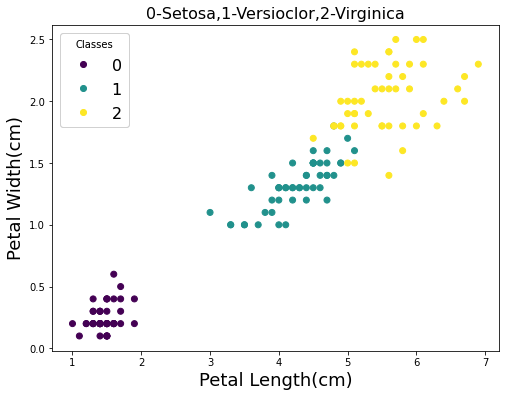

In [ ]:
a, b = df['petal_length'],df['petal_width']# petal length and petal width 
c = y

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(a, b, c=c,label='x')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes",fontsize=16)
ax.add_artist(legend1)
plt.title("0-Setosa,1-Versioclor,2-Virginica",fontsize=16)
plt.xlabel('Petal Length(cm)',fontsize=18)
plt.ylabel('Petal Width(cm)',fontsize=18)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120, 1)


## Punto A. Regularización L1 y L2

Cuando usamos regularización, añadimos un término que penaliza la complejidad del modelo. En el caso del MSE, tenemos:

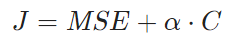

 **Regularización L1, Lasso.**
 En este caso la complejidad C se mide como la media del valor absoluto de los coeficientes del modelo.

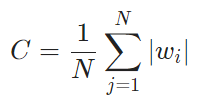

En el caso del MSE, la funcion quedaria:

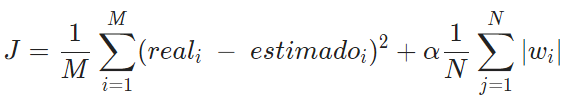





1.   Lasso nos va a servir de ayuda cuando sospechemos que varios de los atributos 
de entrada (features) sean irrelevantes. Al usar Lasso, estamos fomentando que la solución sea poco densa.

2.   Lasso nos puede ayuda a hacer la selección de atributos de entrada. Lasso funciona mejor cuando los atributos no están muy correlados entre ellos.






 **Regularización L2, Ridge.**
 En este caso la complejidad C se mide como la media del cuadrado de los coeficientes del modelo.

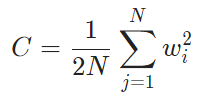

Para la MSE la funcion quedaria:

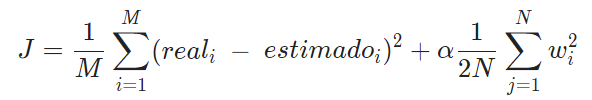





1.   Ridge nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada (features) estén correlados entre ellos.
2.   Ridge hace que los coeficientes acaben siendo más pequeños.
3.   Ridge funciona mejor cuando la mayoría de los atributos son relevantes.





In [ ]:
clf = LogisticRegression(penalty='none',solver='sag',multi_class='ovr')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
clf.score(x_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


1.0

In [ ]:
clf1 = LogisticRegression(penalty='l2',solver='liblinear',multi_class='ovr')
clf1.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
clf1.score(x_test, y_pred1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
clf2 = LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr')
clf2.fit(x_train,y_train)
y_pred2=clf2.predict(x_test)
clf2.score(x_test, y_pred2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

## Punto B. Perdida de entropía Cruzada

La Regresión Logística es un Algoritmo Supervisado y se utiliza en escenarios de clasificación, es tambien llamado regresión logit, o clasificador de máxima entropía, y es uno de los modelos conocidos como modelos lineales generalizados.
 
La regresión logística describe la probabilidad de que la variable objetivo pertenezca a una clase o a otra: dado un cierto valor límite, si el valor de la variable objetivo iguala o excede dicho valor, se devuelve como predicción la clase "positiva". En otro caso se devuelve como predicción la clase "negativa". Para ello se utiliza la función logística, que siempre devuelve un valor entre 0 y 1.

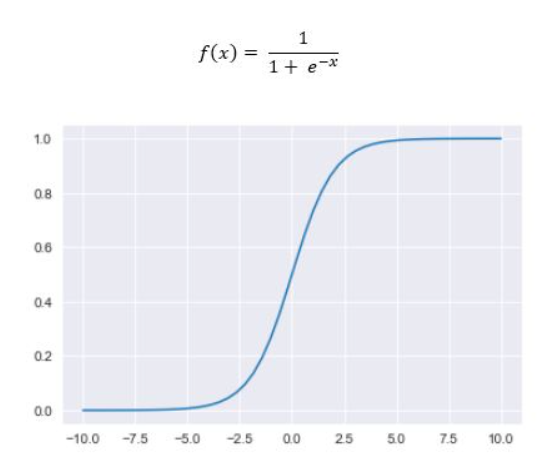



Para optimizar los parámetros del modelo se puede aplicar el algoritmo de descenso de gradiente básico que son los pesos y el sesgo.

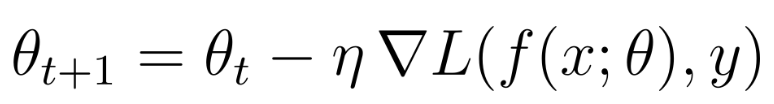

Donde, 

*  θ (theta) es el parámetro. Por ejemplo, sus pesos o sesgos.
*  θ t es el valor actual del parámetro.
*  θ t+1 es el siguiente valor del parámetro.
*  η (eta) es la tasa de aprendizaje, que normalmente se establece en un valor entre 0,1 y 0,0001.
*  ∇L se refiere a los gradientes (∇, nabla) de la función (L)oss, que presento a continuación. Toma sus entradas (x), los valores de sus parámetros (θ) y las etiquetas (y).

La función de pérdida (también conocida como función de costo) es una función que se usa para medir cuánto difiere la predicción de las etiquetas. Para utilizar la entropía cruzda se debe utilizar la siguiente funcion qye produce el valor del error.


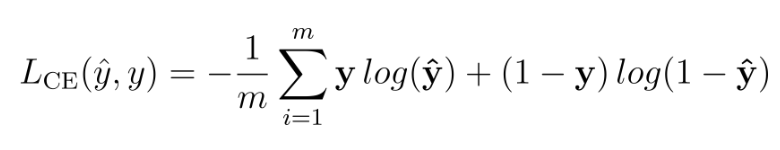

Si se observa el signo '+' en la ecuación, cuando y=0, el lado izquierdo es igual a 0, y cuando y=1, el lado derecho es igual a 0.

De esta manera se mide cuanto la predicción ŷ difiere de la etiqueta y, que solo puede ser 0 o 1 en un algoritmo de clasificación binaria.

Para calcular los gradientes para optimizar los pesos usando el descenso de gradiente, debe calcular la derivada parcial de la entropía cruzada binaria.

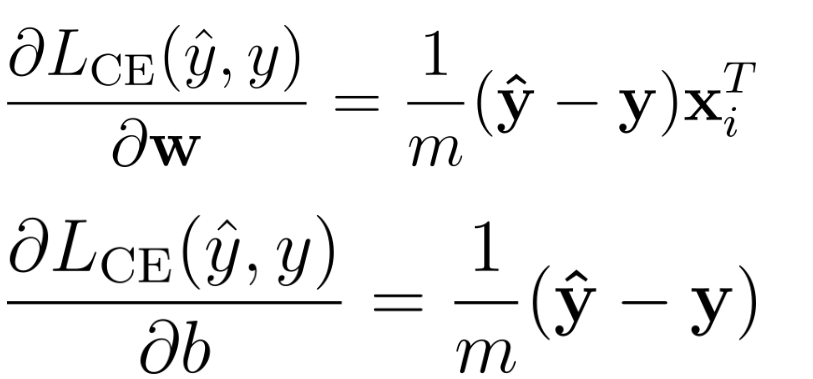

In [ ]:
import copy
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:

class CustomLogisticRegression():
    def __init__(self):
        self.losses = []
        self.train_accuracies = []

    def fitGD(self, x, y, epochs):
        x = self._transform_x(x)
        y = self._transform_y(y)

        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)        

    
    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)


In [ ]:
model_GD = LogisticRegression(solver='newton-cg', max_iter=150)
model_GD.fit(x_train, y_train)
pred_GD = model_GD.predict(x_test)
accuracy2 = accuracy_score(y_test, pred_GD)
print(accuracy2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



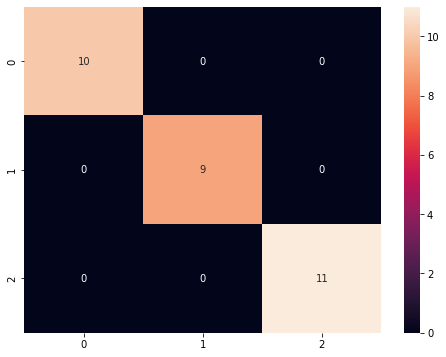

In [ ]:
mconf = metrics.confusion_matrix(y_test,pred_GD)
print(metrics.classification_report(y_test, pred_GD))
plt.figure(figsize=(8, 6))
sns.heatmap(mconf, annot=True)
plt.show()

## Punto C. Opciones para la Multi_clase

### 1. One-Vs-Rest (OVR)

El clasificador de uno contra el resto (o uno contra todos, OvA) implica entrenar un solo clasificador por clase, con las muestras de esa clase como muestras positivas y todas las demás muestras como negativas.


Para OVA, la suposición es que hay N problemas de clasificación independientes, lo que significa N clases, y para cada clase aprendemos un modelo logístico (probabilidad). La suposición clave es que cada uno de estos problemas es independiente de los otros N−1 problemas de regresión logística. Por lo tanto, para cada muestra la clasificamos como clase Yi o no. Esto se repite para todas las clases.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.89      0.94         9
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



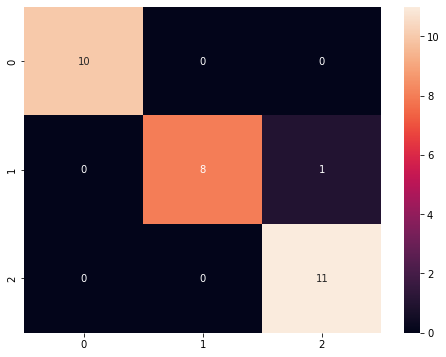

In [ ]:
lr_iris_ovr = LogisticRegression(multi_class='ovr')
lr_iris_ovr = lr_iris_ovr.fit(x_train, y_train)
y_pred_ovr = lr_iris_ovr.predict(x_test)

print(metrics.classification_report(y_test, y_pred_ovr))

matrix_ovr = metrics.confusion_matrix(y_test, y_pred_ovr)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_ovr, annot=True)
plt.show()

### 2. Multinomial

El clasificador multinomial no clasifica cada clase por separado, sino que utiliza la función softmax para predecir si un solo punto de datos cae en una de las N clases.

La función Softmax calcula la distribución de probabilidades del evento sobre N eventos diferentes. En términos generales, esta función calcula las probabilidades de cada clase objetivo sobre todas las clases objetivo posibles.



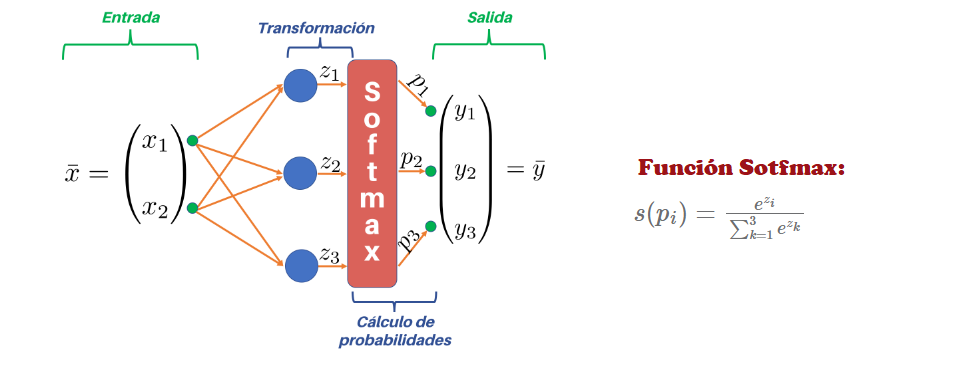

Esta función permite normalizar las tres probabilidades, garantizando que la suma de las mismas sea igual a 1.0.

Posteriormente, para realizar la clasificación se determina cuál de las tres probabilidades calculadas tiene el valor más alto, que corresponderá a la clase asignada.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



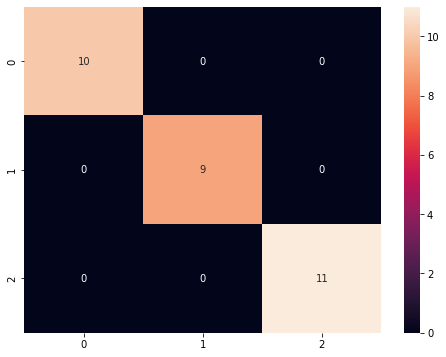

In [ ]:
lr_iris_mult = LogisticRegression(multi_class='multinomial')
lr_iris_mult = lr_iris_mult.fit(x_train, y_train)
y_pred_mult = lr_iris_mult.predict(x_test)

print(metrics.classification_report(y_test, y_pred_mult))

matrix_mult = metrics.confusion_matrix(y_test, y_pred_mult)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_mult, annot=True)
plt.show()

##Punto D. Uso del solver = 'sag'

El solver='sag' se utiliza principalmente en problemas multiclase, se debe tener en cuenta que la eleccion del algoritmo depende de la penalizacion elegida, en el caso de 'sag' las las penalizaciones admitidas son ‘sag’ - [‘l2’, ‘none’].

La convergencia rápida 'sag' y 'saga' solo está garantizada en características con aproximadamente la misma escala.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



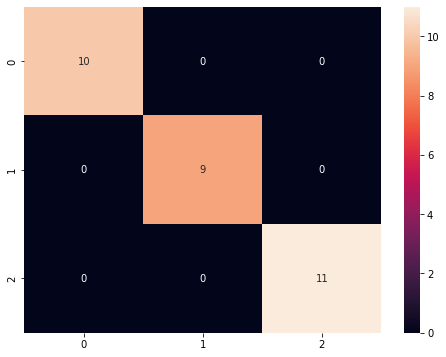

In [ ]:
sag = LogisticRegression(solver='sag', multi_class='multinomial')
sag = sag.fit(x_train, y_train)
y_pred_sag = sag.predict(x_test)

print(metrics.classification_report(y_test, y_pred_sag))

matrix_sag = metrics.confusion_matrix(y_test, y_pred_sag)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_sag, annot=True)
plt.show()

## Punto E. Clase SGDClassifier de sklearn.

Este estimador implementa modelos lineales regularizados con aprendizaje de descenso de gradiente estocástico (SGD): el gradiente de la pérdida se estima cada muestra a la vez y el modelo se actualiza a lo largo del camino con un programa de fuerza decreciente (también conocido como tasa de aprendizaje). SGD permite el aprendizaje de minilotes.

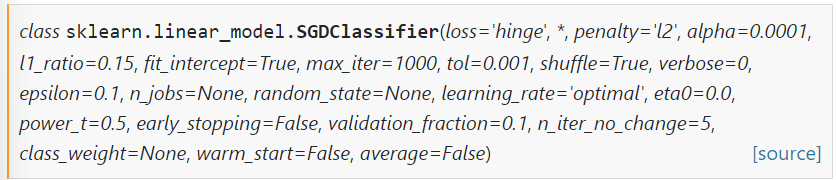

SGDClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


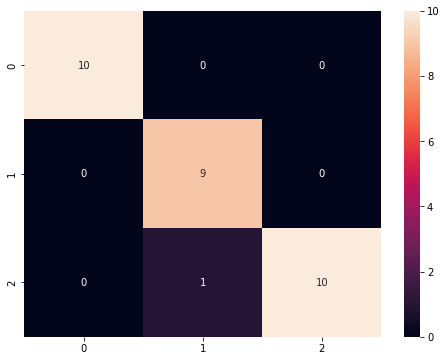

In [ ]:
sgdc = SGDClassifier()
print(sgdc)

sgdc.fit(x_train, y_train)

ypred_sgd = sgdc.predict(x_test)


print(metrics.classification_report(y_test, ypred_sgd))

matrix_sgd = metrics.confusion_matrix(y_test, ypred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_sgd, annot=True)
plt.show()

##Punto F.

In [ ]:
# Cargamos el dataset para realizar ejemplos
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/adult/adult.data', encoding = 'utf-8',
                 header = None)

# AÃ±adimos el nombre de cada variable
df.columns = ["age", "workclass", "fnlwgt", "education", 
              "education-num", "marital-status", "occupation", 
              "relationship", "race", "sex", "capital-gain", 
              "capital-loss", "hours-per-week", "native-country", 
              "class"]

###**Codificación ordinal.**
Consiste en remplazar cada valor de la variable con un número entero distinto. Es por ello que la codificación ordinal resulta útil cuando tenemos datos ordinales, es decir, aquellos en los que se puede establecer un orden entre sus categóricas. En consecuencia, esta técnica nos ayudará a representar esta relación de orden de las distintas categorías.
En el caso de las variables nominales que no posean un orden, no es recomendable el uso de este tipo de codificación. Esto se debe a que, asignando números a cada categoría, estamos creando una jerarquía en los datos que en muchos casos no existe. Por esa razón, esto puede provocar que los modelos de machine learning malinterpreten los datos y como consecuencia que su rendimiento sea peor.



In [ ]:
#Ejemplo con la variable ordunal education
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Como se puede observar la variable education, se puede ordenar en un orden especifico

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[[" Preschool", " 1st-4th", 
                                      " 5th-6th", " 7th-8th", " 9th", 
                                      " 10th", " 11th", " 12th", 
                                      " HS-grad", " Some-college", 
                                      " Assoc-voc", " Assoc-acdm", 
                                      " Bachelors", " Masters", 
                                      " Prof-school", " Doctorate"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["education"]])
df["education-encoded"] = encoder.transform(df[["education"]])

In [ ]:
df[["education", "education-encoded"]].head(10)

,education,education-encoded
0,Bachelors,12.0
1,Bachelors,12.0
2,HS-grad,8.0
3,11th,6.0
4,Bachelors,12.0
5,Masters,13.0
6,9th,4.0
7,HS-grad,8.0
8,Masters,13.0
9,Bachelors,12.0


###**One-Hot encoding.**

Para las variables nominales que no tengan un orden jerárquico en sus categorías, la mejor solución es la llamada codificación one-hot. Esta segunda técnica consiste en crear una nueva variable binaria (también llamada dummy) por cada categoría existente en la variable a codificar.  Así, estas nuevas variables contendrán 1 en aquellas observaciones que pertenezcan a esa categoría y 0 en el resto.

En muchas tareas, tales como la regresión lineal, es común usar k-1 variables binarias en lugar de k, donde k es el número total de categorías. Esto se debe a que estamos añadiendo una variable extra redundante que no es más que una combinación lineal de las otras y seguramente afectará de manera negativa al rendimiento del modelo. Además, al eliminar una variable no estamos perdiendo información, ya que se entiende que, si el resto de las categorías contienen un 0, la categoría correspondiente es la de la variable eliminada.



En este caso,  y aprovechando el dataset trataremos a la variable race que indica la raza de la persona y tiene 5 categorías únicas.

In [ ]:
df.race.value_counts()


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
# Creamos las variables binarias
dummies = pd.get_dummies(df['race'], drop_first = True)
dummies.head()

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [ ]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['race'])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,class,education-encoded,Asian-Pac-Islander,Black,Other,White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,12.0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,12.0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,8.0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,6.0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,12.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K,11.0,0,0,0,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K,8.0,0,0,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K,8.0,0,0,0,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K,8.0,0,0,0,1


###**Codificación target**

Mediante la codificación target sustituimos nuestra variable categórica por una única nueva variable de tipo numérico que contiene información de la variable objetivo. El funcionamiento en su forma básica es bastante simple:

*  En primer lugar, por cada categoría única que tenga la variable a codificar se calcula la media correspondiente a sus valores en la variable objetivo.
*	   Después, se reemplaza cada valor por el de la media calculada.
Eso sería en el supuesto de que nuestra variable objetivo sea numérica, pero también se puede recurrir a esta técnica para variables categóricas, en cuyo caso se calcula la probabilidad asociada a esa categoría en lugar de la media.
La ventaja de este método es que es bastante rápido y no añade dimensiones a nuestro conjunto de datos.

Debido a la fuerte relación que tiene con la variable objetivo, el problema de utilizar este método es que puede dar lugar a sobreajuste. Esto se puede dar sobre todo en los casos en los tenemos pocos valores en las categorías y tenemos que calcular la media de esos valores. Debido a ello, no es recomendable usar esta técnica sin algún tipo de regularización para evitar el sobreajuste.


In [ ]:
# Cargamos el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'
                 'databases/autos/imports-85.data', encoding = 'utf-8', 
                 header = None)

# Añadimos el nombre de cada variable
df.columns = ["symboling","normalized-losses","make","fuel-type",
              "aspiration","num-of-doors","body-style","drive-wheels",
              "engine-location","wheel-base","length","width",
              "height","curb-weight","engine-type","num-of-cylinders",
              "engine-size","fuel-system","bore","stroke",
              "compression-ratio","horsepower","peak-rpm","city-mpg",
              "highway-mpg","price"]

# Rellenamos los valores perdidos
df['price'] = df['price'].replace(['?'], 10000)

# Convertimos columna "price" a numerica
df["price"] = pd.to_numeric(df["price"])

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 681 kB/s 


In [ ]:
from category_encoders import TargetEncoder

# Creamos el codificador Target indicando nuestra variable
encoder = TargetEncoder(cols = ['make'], smoothing = 0)

# Ajustamos el codificador indicandole la variable objetivo
encoder.fit(df["make"], df['price'])
new_make = encoder.transform(df["make"], df['price'])

# Concatenamos la nueva variable con el resto
df = pd.concat((df, new_make.make.rename('new_make')), axis=1)

In [ ]:
df[["make", "price", "new_make"]].head(10)

,make,price,new_make
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,16736.428571
4,audi,17450,16736.428571
5,audi,15250,16736.428571
6,audi,17710,16736.428571
7,audi,18920,16736.428571
8,audi,23875,16736.428571
9,audi,10000,16736.428571


##REFERENCIAS
*  https://aprendeia.com/evaluando-el-error-en-los-modelos-de-regresion/
*  https://interactivechaos.com/es/manual/tutorial-de-machine-learning/regresion-logistica
*  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
*  https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
- https://refactored.ai/microcourse/notebook?path=content%2F06-Classification_models_in_Machine_Learning%2F02-Multivariate_Logistic_Regression%2Fmulticlass_logistic-regression.ipynb#1.-One-Vs-Rest-(OVR)

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- https://www.codificandobits.com/blog/regresion-multiclase/

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

- https://www.datatechnotes.com/2020/09/sgd-classification-example-with-sgdclassifier-in-python.html

- https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/

- https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-binaria-hashing/

- https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-target/

- https://www.iartificial.net/regularizacion-lasso-l1-ridge-l2-y-elasticnet/




